# Benchmarking NumPy, ndarray, and RMatrix

In [1]:
import numpy as np
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import json

In [2]:
np.show_config()

{
  "Compilers": {
    "c": {
      "name": "clang",
      "linker": "ld64",
      "version": "15.0.0",
      "commands": "cc"
    },
    "cython": {
      "name": "cython",
      "linker": "cython",
      "version": "3.0.12",
      "commands": "cython"
    },
    "c++": {
      "name": "clang",
      "linker": "ld64",
      "version": "15.0.0",
      "commands": "c++"
    }
  },
  "Machine Information": {
    "host": {
      "cpu": "aarch64",
      "family": "aarch64",
      "endian": "little",
      "system": "darwin"
    },
    "build": {
      "cpu": "aarch64",
      "family": "aarch64",
      "endian": "little",
      "system": "darwin"
    }
  },
  "Build Dependencies": {
    "blas": {
      "name": "accelerate",
      "found": true,
      "version": "unknown",
      "detection method": "system",
      "include directory": "unknown",
      "lib directory": "unknown",
      "openblas configuration": "unknown",
      "pc file directory": "unknown"
    },
    "lapack": {
      "name

/Users/merrickliu/.local/share/virtualenvs/rmatrix-18vTgJF8/lib/python3.11/site-packages/numpy/__config__.py:155: UserWarning: Install `pyyaml` for better output
  warnings.warn("Install `pyyaml` for better output", stacklevel=1)


In [3]:
def visualize_results(numpy_results: dict, rmatrix_results: dict):
    """
    Visualize the results of the benchmark tests.
    """
    sns.lineplot(x=numpy_results['sizes'], y=numpy_results['times'], label='NumPy')
    sns.lineplot(x=rmatrix_results['sizes'], y=rmatrix_results['times'], label='RMatrix')

    plt.xlabel('Matrix Size (n x n)')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison')

    plt.legend()
    plt.show()


def benchmark_numpy_matrix_to_matrix(matrix_set1: list[np.ndarray], matrix_set2: list[np.ndarray], test_function) -> dict:
    """
    Benchmark the performance of the test function for NumPy.
    """
    sizes = []
    times = []
    for i in tqdm.tqdm(range(len(matrix_set1)), desc="Benchmarking NumPy"):
        matrix1 = matrix_set1[i]
        matrix2 = matrix_set2[i]
        sizes.append(matrix1.shape[0])
        time = timeit.timeit(lambda: test_function(matrix1, matrix2), number=10) / 10
        times.append(time)

    return {'sizes': sizes, 'times': times}

def benchmark_numpy_scalar_to_matrix(matrix_set: list[np.ndarray], scalar: float) -> dict:
    """
    Benchmark the performance of the test function for NumPy.
    """
    sizes = []
    times = []

    for i in tqdm.tqdm(range(len(matrix_set)), desc="Benchmarking NumPy"):
        matrix = matrix_set[i]
        sizes.append(matrix.shape[0])
        time = timeit.timeit(lambda: scalar * matrix, number=10) / 10
        times.append(time)

    return {'sizes': sizes, 'times': times}

def benchmark_rmatrix() -> dict:
    """
    Benchmark the performance of the test function for RMatrix.
    """
    return {'sizes': [], 'times': []}


In [4]:
def load_matrices(filename: str) -> list[np.ndarray]:
    """
    Load a list of matrices from a json file
    """
    with open(filename, 'r') as f:
        return [np.array(matrix) for matrix in json.load(f)]


In [5]:
matrix_set1 = load_matrices("./matrices.json")
matrix_set2 = load_matrices("./matrices.json")

## Addition

Benchmarking NumPy: 100%|██████████| 100/100 [00:00<00:00, 1077.18it/s]


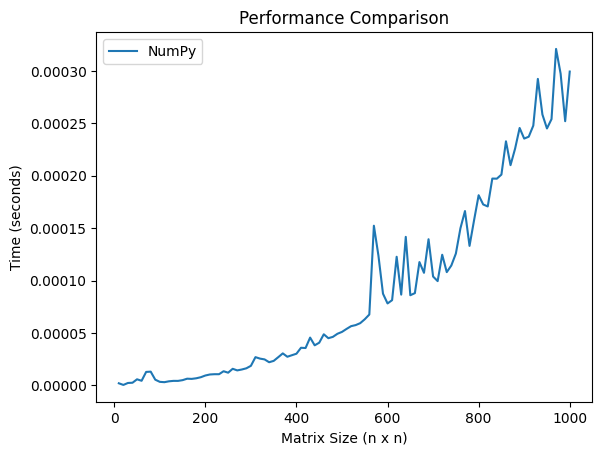

In [6]:
def add(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    return matrix1 + matrix2

numpy_results = benchmark_numpy_matrix_to_matrix(matrix_set1, matrix_set2, add)
rmatrix_results = benchmark_rmatrix()

visualize_results(numpy_results, rmatrix_results)

## Subtraction

Benchmarking NumPy: 100%|██████████| 100/100 [00:00<00:00, 1132.73it/s]


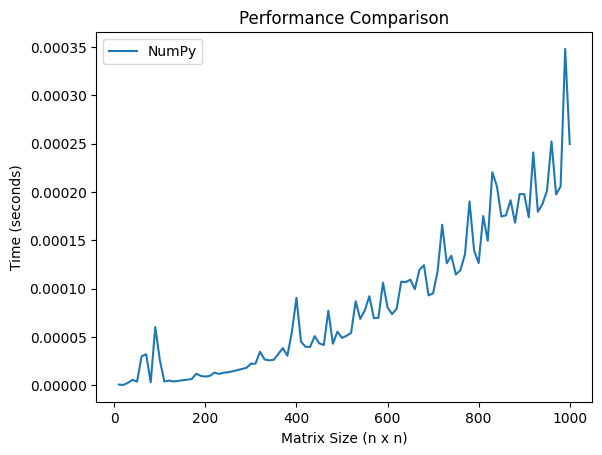

In [7]:
def subtract(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    return matrix1 - matrix2

numpy_results = benchmark_numpy_matrix_to_matrix(matrix_set1, matrix_set2, subtract)
rmatrix_results = benchmark_rmatrix()

visualize_results(numpy_results, rmatrix_results)

## Matrix Multiplication

Benchmarking NumPy: 100%|██████████| 100/100 [00:01<00:00, 70.60it/s]


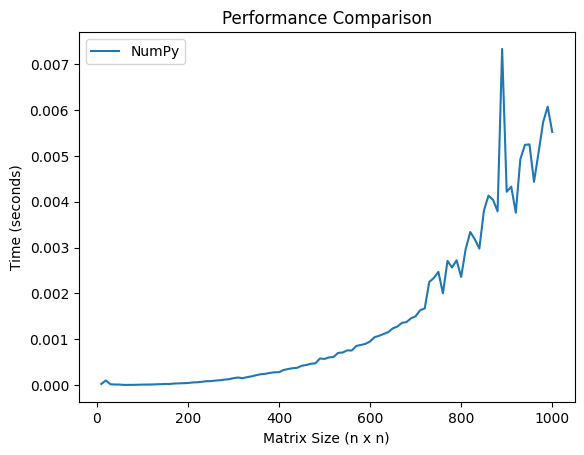

In [8]:
def multiply(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    return matrix1 @ matrix2

numpy_results = benchmark_numpy_matrix_to_matrix(matrix_set1, matrix_set2, multiply)
rmatrix_results = benchmark_rmatrix()

visualize_results(numpy_results, rmatrix_results)

## Scalar Multiplication

Benchmarking NumPy: 100%|██████████| 100/100 [00:00<00:00, 1516.19it/s]


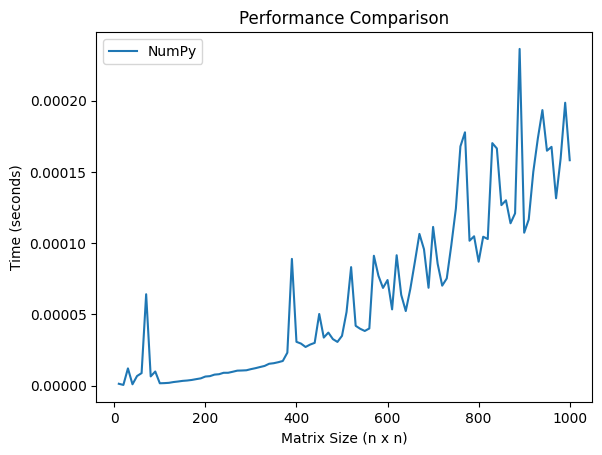

In [9]:
numpy_results = benchmark_numpy_scalar_to_matrix(matrix_set1, 2)
rmatrix_results = benchmark_rmatrix()

visualize_results(numpy_results, rmatrix_results)